In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
from scipy import stats

In [2]:
df = pd.read_csv('UPDATE_HOUSE.csv')
df

,Type of housing,Area,Price,Metro name,Metro distance,District,Living space,Ceiling height,Floor,Max Floor
0,квартира,75.2,7 500 000,Технологический институт,0.3,Адмиралтейский район,50.9,3.05,4,5
1,квартира,112.5,12 900 000,Владимирская,1.1,Адмиралтейский район,73.0,3.60,4,6
2,квартира,135.6,26 929 000,Приморская,1.0,Василеостровский район,78.4,3.31,10,16
3,квартира,143.6,23 769 000,Приморская,1.0,Василеостровский район,76.3,3.00,4,10
4,квартира,163.0,24 400 000,Приморская,0.9,Василеостровский район,73.9,3.00,2,8
...,...,...,...,...,...,...,...,...,...,...
7200,квартира,50.0,5 700 000,Проспект Ветеранов,0.6,Кировский район,37.3,NaN,1,5
7201,квартира,39.5,5 050 000,Проспект Ветеранов,1.3,Кировский район,18.3,NaN,19,23
7202,квартира,40.0,4 700 000,Проспект Ветеранов,1.3,Кировский район,18.7,NaN,4,23
7203,квартира,35.0,4 300 000,Проспект Ветеранов,0.5,Кировский район,20.0,NaN,11,12


# Анализируем Price
## Для этого приводим данные в подходящий вид (убираем пробелы, меняем тип на int, сортируем)


In [3]:
df['Price'] = df['Price'].apply(lambda x: ''.join(x.split())).astype(int)
df = df.sort_values('Price', kind = 'mergesort')

In [4]:
df['Price'][df['Metro name'] == 'Проспект Ветеранов'].count()

446

# Нормальность распределения.  Критерий Шапиро-Уилка

(array([ 1.,  1.,  5.,  3.,  4.,  7., 11., 11., 10.,  5.,  5.,  6.]),
 array([2500000., 2550000., 2600000., 2650000., 2700000., 2750000.,
        2800000., 2850000., 2900000., 2950000., 3000000., 3050000.,
        3100000.]),
 <a list of 12 Patch objects>)

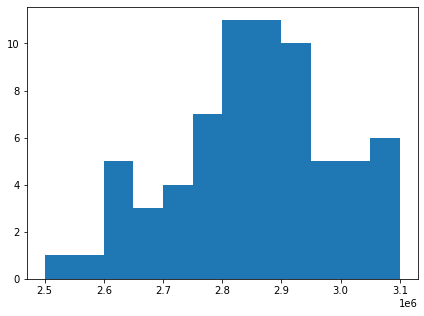

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (7,5))
plt.hist(df['Price'][df['Metro name'] == 'Проспект Ветеранов'][10:79], bins=12)

In [6]:
res = stats.shapiro(df['Price'][df['Metro name'] == 'Проспект Ветеранов'][10:79])
print('p-value: ', res[1])

p-value:  0.33900144696235657


In [7]:
res = stats.shapiro(df['Price'][df['Metro name'] == 'Проспект Ветеранов'][10:90])
print('p-value: ', res[1])

p-value:  0.0935351699590683


In [8]:
res = stats.shapiro(df['Price'][df['Metro name'] == 'Проспект Ветеранов'][0:100])
print('p-value: ', res[1])

p-value:  2.606613236366684e-07


In [9]:
res = stats.shapiro(df['Price'][df['Metro name'] == 'Проспект Ветеранов'])
print('p-value: ', res[1])

p-value:  8.896526673099315e-17


### По критерию Шапиро-Уилка видим, что данные о жилье на Проспекте Ветеранов имееют нормальное (более менее) распределение, если рассматривать 10:79.


# Зависимость цены жилья от площади. Критерий Манна-Уитни. Сравниваем медианы. Основная гипотеза -- нет влияния площади жилья на стоимость



In [10]:
df = df.sort_values('Area', kind = 'mergesort')
df['Area'] = df['Area'].astype(int)

In [11]:
first_part = df[0:45]
second_part = df[5:50]
third_part = df[45:90]

(array([ 1.,  0.,  1.,  0.,  0.,  4.,  6., 14.,  5.,  7.,  2.,  1.,  0.,
         3.,  1.]),
 array([1636000.        , 1816466.66666667, 1996933.33333333,
        2177400.        , 2357866.66666667, 2538333.33333333,
        2718800.        , 2899266.66666667, 3079733.33333333,
        3260200.        , 3440666.66666667, 3621133.33333333,
        3801600.        , 3982066.66666667, 4162533.33333333,
        4343000.        ]),
 <a list of 15 Patch objects>)

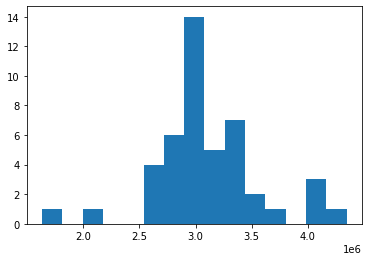

In [12]:
plt.hist(second_part['Price'], bins=15)

In [13]:
stats.shapiro(first_part['Price'])[1]

0.001961630769073963

In [14]:
stats.shapiro(second_part['Price'])[1]

0.007707869168370962

In [15]:
stats.shapiro(third_part['Price'])[1]

0.010247628204524517

In [16]:
def two_histograms(x, y):
# После определения функции полезно бывает добавить её описание в таком стиле.
# Тройные кавычки -- для обрамления многострочных строковых литералов.
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.8, bins=15)
    y.hist(alpha=0.2, bins=15)
    plt.axvline(x.mean(), color='red', linestyle='dashed')
    plt.axvline(y.mean(), color='blue', linestyle='dashed')

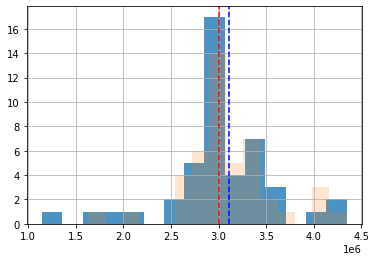

In [17]:
two_histograms(first_part['Price'], second_part['Price'])

In [18]:
res = stats.mannwhitneyu(first_part['Area'], second_part['Area'])
print('p-value:', res[1])

p-value: 0.05820354130267784


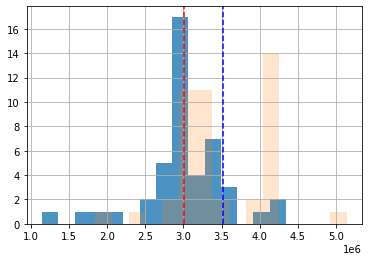

In [19]:
two_histograms(first_part['Price'], third_part['Price'])

In [20]:
res = stats.mannwhitneyu(first_part['Area'], third_part['Area'])
print('p-value:', res[1])

p-value: 1.1289815843757808e-14


### Видно, что при почти одинаковых сравниваемых наборах не отвергается основная гипотеза, а при разных (что и должно быть), гипотеза отвергается. Итог: Цена имеет зависимость от площади

# Анализируем Metro distance.
## Хотим найти нормально распределенные данные, для использования критерия Стюдента

In [3]:
df = df.sort_values('Metro distance', kind='mergesort')

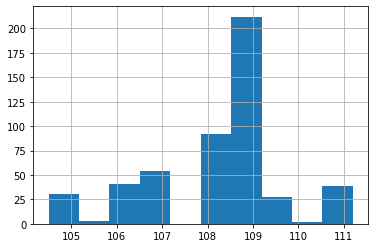

In [4]:
df['Metro distance'][6000:6500].hist()

In [6]:
stats.shapiro(df['Metro distance'][6000:6500])

ShapiroResult(statistic=0.9144232869148254, pvalue=3.3256612562726246e-16)

### Гипотеза, что коэффициент кореляции равен нулю отвергнута

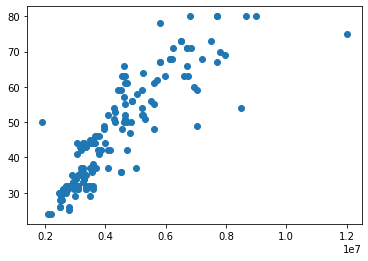

In [24]:
plt.scatter(df['Price'][df['District'] == 'Петродворцовый район'][100:250], df['Area'][df['District'] == 'Петродворцовый район'][100:250])

In [25]:
res = stats.pearsonr(df['Price'][df['District'] == 'Петродворцовый район'][100:250], df['Area'][df['District'] == 'Петродворцовый район'][100:250])
print('Pearson rho: ', res[0])
print('p-value: ', res[1])

Pearson rho:  0.8607948852499918
p-value:  2.939970931692348e-45


(array([  1.,   4.,   7.,  10.,  22.,  79., 279., 593., 275., 271., 556.,
        433., 325., 173., 155., 152.,  51.,  67., 106.,  35.,  23.,  15.,
          4.,   3.,   8.,   3.,   5.,   3.,   4.,   6.,   5.,   0.,   2.,
          3.,   2.,   2.,   2.,   3.,   4.,   1.,   4.,   0.,   1.,   2.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([6.20411998, 6.24833705, 6.29255412, 6.33677118, 6.38098825,
        6.42520532, 6.46942239, 6.51363945, 6.55785652, 6.60207359,
        6.64629066, 6.69050772, 6.73472479, 6.77894186, 6.82315892,
        6.86737599, 6.91159306, 6.95581013, 7.00002719, 7.04424426,
        7.08846133, 7.1326784 , 7.17689546, 7.22111253, 7.2653296 ,
        7.30954667, 7.35376373, 7.3979808 , 7.44219787, 7.48641493,
        7.530632  , 7.57484907, 7.61906614, 7.6632832 , 7.70750027,
        7.75171734, 7.79593441, 7.84015147, 7.88436854, 7.92858561,
        7.97280267, 8.01701974, 8.06123681, 8.10545388, 8.14967094,
        8.19388801, 8.23810508, 8.28232215, 8.

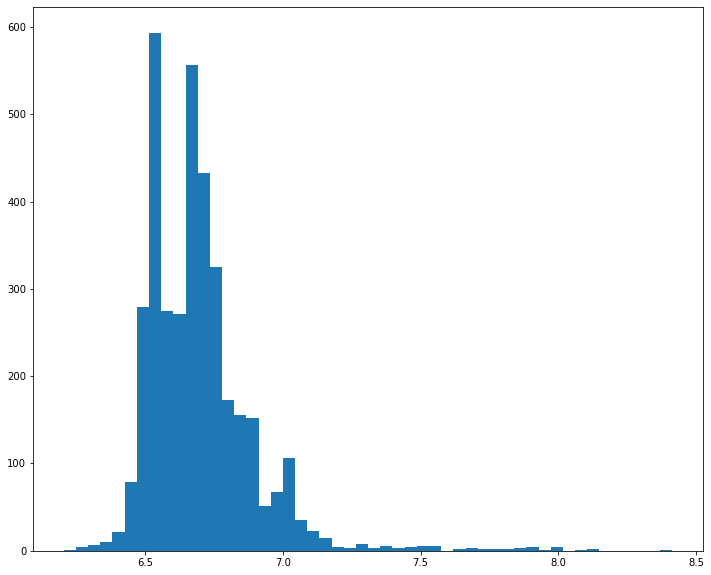

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (12,10))
plt.hist(np.log10(df['Price'][1300:5000]), bins=50)

In [27]:
res = stats.shapiro(df['Price'][1300:6000])
print('p-value: ', res[1])

p-value:  0.0


# Анализируем Floor 
## Хотим найти нормально распределенные данные, для использования критерия Стюдента

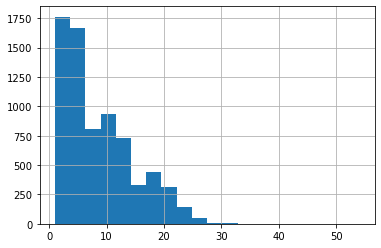

In [28]:
df['Floor'].hist(bins = 20)

(array([4.990e+02, 6.740e+02, 5.900e+02, 6.280e+02, 1.470e+03, 1.043e+03,
        1.338e+03, 9.050e+02, 5.700e+01, 1.000e+00]),
 array([0.        , 0.17323938, 0.34647875, 0.51971813, 0.6929575 ,
        0.86619688, 1.03943626, 1.21267563, 1.38591501, 1.55915438,
        1.73239376]),
 <a list of 10 Patch objects>)

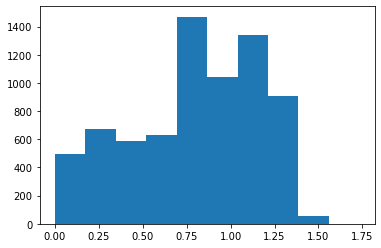

In [29]:
plt.hist(np.log10(df['Floor']), bins=10)

In [30]:
df = df.sort_values('Floor', kind='mergesort')


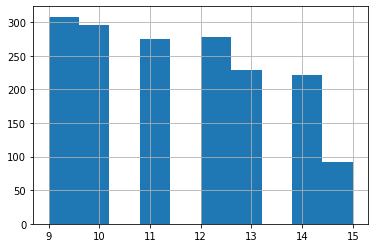

In [31]:
df['Floor'][4300:6000].hist(bins = 10)

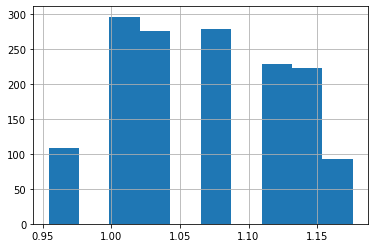

In [33]:
np.log10(df['Floor'][4500:6000]).hist()

In [34]:
stats.shapiro(rev(df['Floor'][4500:6000]))

ShapiroResult(statistic=0.9325056672096252, pvalue=1.705351862816764e-25)

### Хотел найти нормальное распределение среди имеющихся данных. Не получилось :(                                      Тогда сгенерируем 

In [35]:
import random

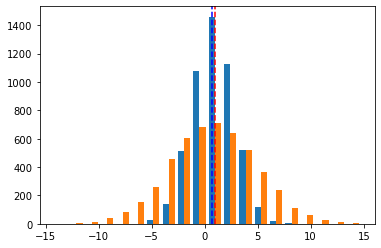

In [36]:
mu_x = random.uniform(0.0, 1.0)
mu_y = random.uniform(0.0, 1.0)
x = np.random.normal(mu_x, 2, 5000)
y = np.random.normal(mu_y, 4, 5000)

plt.axvline(x.mean(), color='red', linestyle='dashed')
plt.axvline(y.mean(), color='blue', linestyle='dashed')

plt.hist([x, y], bins=20)
plt.show()

In [37]:
print('p-values: ', stats.shapiro(x)[1], stats.shapiro(y)[1])

p-values:  0.33027058839797974 0.9046659469604492


### p-value в обоих случаях получилось больше, чем alpha, т.е. данные нормально распределены

In [38]:
stats.ttest_ind(x,y)[1]

6.856472670398631e-06

### e-06 => Гипотеза о равенстве средних отвергается

In [39]:
print('x.mean(): ', x.mean(), '\n', 'y.mean(): ', y.mean())

x.mean():  0.942718976889275 
 y.mean():  0.6592009124966739
